# Topic Modeling with Sklearn: NMF, LDA and LSI

## 1. Get the data

1. **Download wikipedia dumps:**

```
wget simplewiki-latest-pages-articles.xml.bz2
```

2. **Clone WikiExtractor:**

```
git clone https://github.com/attardi/wikiextractor.git
```

3. **Unzip the file and extract Wiki Articles**

``` 
cd wikiextractor-master
python WikiExtractor.py simplewiki-latest-pages-articles.xml 
```

4. **Concatenate several extracted files into one and save them in the project root folder:**

```
cat ./wikiextractor-master/text/*/* > full_wiki.txt
```

    Or use any of the smallerr filed from ./data folder

5. **Install the requirements**

```
pip install -r requirements
```

## 2. Train the models

In [1]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords

from wordcloud import WordCloud, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import train_test_split

import logging

import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('../TextAnalyser')))
from TextAnalyser.TopicModeling import TopicModeling

lemm = WordNetLemmatizer()

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Prepare data

In [2]:
# Read file
wiki = open('../data/merged_wiki.txt')
parsed_documents = BeautifulSoup(wiki)
docs = parsed_documents.findAll("doc")
print('Number of documents:', len(docs))

# Clean text
docs_list = []
for doc in docs:
    text = doc.string
    if isinstance(text, str):
        docs_list.append(text)

# Split to train and test
train_docs, test_docs = train_test_split(docs_list, test_size=0.1, random_state=42)
print(len(train_docs), 'train documents')
print(len(test_docs), 'test documents')

Number of documents: 5298
4716 train documents
525 test documents


# Train models

In [3]:
nmf_modeling = TopicModeling()
nmf_modeling.train_model(train_docs, model_type='nmf')
nmf_modeling.save_model('../models/nmf_model.merged.pkl', '../models/nmf_vectorizer.merged.pkl')

NMF topic values:  (4716, 100)


In [4]:
lda_modeling = TopicModeling()
lda_modeling.train_model(train_docs, model_type='lda')
lda_modeling.save_model('../models/lda_model.merged.pkl', '../models/lda_vectorizer.merged.pkl')

LDA topic values:  (4716, 100)


In [5]:
lsi_modeling = TopicModeling()
lsi_modeling.train_model(train_docs, model_type='lsi')
lsi_modeling.save_model('../models/lsi_model.merged.pkl', '../models/lsi_vectorizer.merged.pkl')

LSI topic values:  (4716, 100)


# Show top keywords for different models

In [6]:
nmf_topics_df = nmf_modeling.create_topics_df()
nmf_topics_df.to_csv('./results/nmf_topics.merged.csv')

Topic # 0 :  ['young', 'famous', 'final', 'film', 'fighting', 'fight', 'field', 'female', 'feel', 'february', 'feature', 'father', 'faster', 'fast', 'far', 'family', 'equation', 'fall', 'factory', 'fact']
Topic # 1 :  ['calendar', 'starting', 'common', 'year', 'leap', 'started', 'according', 'known', '1970s', '2002', 'ad', '2005', '2003', 'eastern', '2009', '2007', '2004', 'method', 'look', 'use']
Topic # 2 :  ['city', 'largest', '000', 'climate', 'famous', 'biggest', 'people', 'airport', 'center', 'population', 'centre', 'capital', 'live', 'important', 'museum', 'home', 'million', 'known', 'built', 'named']
Topic # 3 :  ['born', 'american', 'singer', 'award', 'best', 'known', 'won', 'california', 'married', 'famous', 'musician', 'grew', 'career', 'host', '1970s', 'heart', 'brother', 'san', '2010', '10']
Topic # 4 :  ['mean', 'place', 'seen', 'greek', 'right', 'good', 'named', 'true', 'method', 'medium', 'internet', 'term', 'try', 'solar', 'hole', 'following', 'meaning', 'member', 'pie

FileNotFoundError: [Errno 2] No such file or directory: './results/nmf_topics.merged.csv'

In [7]:
lda_topics_df = lda_modeling.create_topics_df()
lda_topics_df.to_csv('./results/lda_topics.merged.csv')

Topic # 0 :  ['sea', 'water', 'ocean', 'level', 'dead', 'life', 'surface', 'point', 'reason', 'earth', 'able', 'live', 'west', 'bank', 'exist', 'let', 'bacteria', 'time', 'lake', 'come']
Topic # 1 :  ['usually', 'considered', 'basic', 'long', 'tool', 'common', 'type', 'hand', 'metal', 'probably', 'wood', 'series', 'band', 'record', 'size', 'drink', 'milk', 'people', 'appeared', 'hit']
Topic # 2 :  ['company', 'money', 'car', 'people', 'apple', 'service', 'radio', 'engine', 'business', 'sell', 'buy', 'called', 'product', 'pay', 'sold', 'country', 'public', 'government', 'like', 'model']
Topic # 3 :  ['team', 'league', 'game', 'play', 'season', 'called', 'best', 'national', 'series', 'division', 'thing', 'network', 'player', 'american', 'al', 'card', 'today', 'record', 'time', 'end']
Topic # 4 :  ['short', 'mainly', 'study', 'men', 'type', 'begin', 'television', 'named', 'sold', 'different', 'popular', 'day', 'color', 'like', 'band', 'story', 'doctor', 'america', 'published', 'travel']
T

FileNotFoundError: [Errno 2] No such file or directory: './results/lda_topics.merged.csv'

In [8]:
lsi_topics_df = lsi_modeling.create_topics_df()
lsi_topics_df.to_csv('./results/lda_topics.merged.csv')

Topic # 0 :  ['people', 'called', 'country', 'state', 'year', 'time', 'like', 'world', 'city', 'different', 'united', 'reagan', 'new', 'war', 'language', 'government', 'day', 'use', 'known', 'group']
Topic # 1 :  ['reagan', 'president', 'state', 'united', 'war', 'american', 'republican', 'movie', 'bush', 'union', 'election', 'government', 'said', 'soviet', 'national', 'california', 'vote', 'party', 'later', 'actor']
Topic # 2 :  ['reagan', 'bird', 'album', 'music', 'mario', 'time', 'jackson', 'called', 'game', 'like', 'song', 'band', 'number', 'released', 'movie', 'light', 'different', 'thing', 'computer', 'energy']
Topic # 3 :  ['game', 'mario', 'album', 'player', 'olympic', 'jackson', 'city', 'released', 'team', 'year', 'series', 'band', 'music', 'country', 'video', 'song', 'new', 'sport', 'play', 'world']
Topic # 4 :  ['album', 'jackson', 'music', 'band', 'song', 'released', 'year', 'single', 'new', 'award', 'rock', 'record', 'tour', 'michael', 'day', 'won', 'best', 'million', 'king

FileNotFoundError: [Errno 2] No such file or directory: './results/lda_topics.merged.csv'

# Get topics for train set

In [9]:
full_df = pd.DataFrame({'text': train_docs})
full_df['nfm'] = full_df['text'].apply(nmf_modeling.predict_topic)
full_df['lda'] = full_df['text'].apply(lda_modeling.predict_topic)
full_df['lsi'] = full_df['text'].apply(lsi_modeling.predict_topic)
full_df.head(10)

,text,nfm,lda,lsi
0,Pollution Pollution is when some harmful sub...,"(52, [water, air, liquid, temperature, ice, ra...","(60, [water, gas, air, temperature, carbon, ox...","(0, [people, called, country, state, year, tim..."
1,Schwerin Schwerin is the capital city of the...,"(27, [capital, province, district, greece, cit...","(24, [city, people, area, capital, 000, new, l...","(0, [people, called, country, state, year, tim..."
2,Sir Mix-A-Lot Sir Mix-a-Lot (born Anthony Ra...,"(63, [song, singer, popular, hit, best, 1970s,...","(76, [movie, released, born, american, album, ...","(0, [people, called, country, state, year, tim..."
3,1790,"(0, [young, famous, final, film, fighting, fig...","(0, [sea, water, ocean, level, dead, life, sur...","(0, [people, called, country, state, year, tim..."
4,Epidemic An epidemic is a disease that sprea...,"(74, [disease, doctor, medicine, blood, virus,...","(7, [doctor, disease, medicine, treatment, med...","(0, [people, called, country, state, year, tim..."
5,Pharaoh Pharaohs were kings of ancient Egypt...,"(37, [king, england, henry, queen, kingdom, wi...","(8, [century, ancient, bc, year, roman, time, ...","(0, [people, called, country, state, year, tim..."
6,Electron An electron is a very small piece o...,"(64, [atom, chemical, compound, electron, ener...","(43, [energy, unit, atom, electron, object, re...","(42, [doctor, light, color, electron, energy, ..."
7,"Ashford, Kent Ashford is a large town in Ken...","(88, [county, town, england, district, village...","(24, [city, people, area, capital, 000, new, l...","(0, [people, called, country, state, year, tim..."
8,Apocrypha The Apocrypha are religious texts ...,"(41, [book, wrote, story, written, writer, fam...","(94, [church, christian, religion, catholic, j...","(0, [people, called, country, state, year, tim..."
9,Donald Sutherland Donald McNichol Sutherland...,"(98, [actor, role, best, television, known, pl...","(76, [movie, released, born, american, album, ...","(31, [movie, cell, romania, korea, star, north..."


In [11]:
full_df.to_csv('../results/labeled_train_set.merged.csv')

# Predict topics for test set

In [13]:
full_test_df = pd.DataFrame({'text': test_docs})
full_test_df['nfm'] = full_test_df['text'].apply(nmf_modeling.predict_topic)
full_test_df['lda'] = full_test_df['text'].apply(lda_modeling.predict_topic)
full_test_df['lsi'] = full_test_df['text'].apply(lsi_modeling.predict_topic)
full_test_df.head(10)

,text,nfm,lda,lsi
0,Usenet Netnews is a kind of online service t...,"(13, [computer, program, data, device, drive, ...","(58, [computer, program, user, use, window, so...","(18, [computer, tree, jackson, abortion, progr..."
1,1906 1906 (MCMVI) was a common year starting...,"(1, [calendar, starting, common, year, leap, s...","(13, [year, day, calendar, common, month, week...","(9, [year, day, william, king, church, tree, c..."
2,Line A line is the path of one point moving....,"(75, [usually, called, time, like, type, use, ...","(69, [line, japan, japanese, station, train, n...","(13, [number, mario, mosque, tree, morocco, wi..."
3,Osama bin Laden Osama bin Mohammed bin Awad ...,"(85, [child, father, family, died, mother, son...","(72, [died, family, year, later, father, time,...","(0, [people, called, country, state, year, tim..."
4,Palette knife A palette knife is not actuall...,"(43, [color, red, white, blue, black, green, f...","(25, [color, white, red, blue, green, brown, c...","(52, [color, apple, earth, cancer, black, stri..."
5,Adobe Illustrator Adobe Illustrator is a com...,"(13, [computer, program, data, device, drive, ...","(58, [computer, program, user, use, window, so...","(18, [computer, tree, jackson, abortion, progr..."
6,"Jaguar The jaguar (""Panthera onca"") is a big...","(95, [specie, bird, egg, live, mammal, family,...","(75, [bird, female, male, live, egg, dog, wing...","(0, [people, called, country, state, year, tim..."
7,Atom The atom is the basic unit of matter. I...,"(64, [atom, chemical, compound, electron, ener...","(43, [energy, unit, atom, electron, object, re...","(0, [people, called, country, state, year, tim..."
8,"Carl Radle Carl Dean Radle (born June 18, 19...","(6, [album, released, single, record, hit, sol...","(76, [movie, released, born, american, album, ...","(4, [album, jackson, music, band, song, releas..."
9,William III of Aquitaine William III of Aqui...,"(37, [king, england, henry, queen, kingdom, wi...","(31, [france, king, henry, england, french, wi...","(9, [year, day, william, king, church, tree, c..."


In [14]:
full_test_df.to_csv('../results/labeled_test_set.merged.csv')

# Compare WordClouds for different models

In [15]:
test_docs[30]

'\nSamoa\n\nThe Independent State of Samoa is a country in Pacific Ocean. It became independent from New Zealand in 1962. It has two islands, including Upolu and Savai\'i. The capital of Samoa is Apia. It is on the island of Upolu. The head of the country is Malietoa Tanumafili II. \n\nThe languages spoken in Samoa include Samoan and English. \n\nThe sport that is most popular in Samoa is Rugby, and many Samoan people play Rugby.\n\nSamoa was admitted to the United Nations on 15 December 1976.\n\nSamoa has eleven political districts. These are called "itūmālō". These are the traditional eleven districts that were made well before European arrival.\n\nSamoa is south of the equator. It is about halfway between Hawai‘i and New Zealand in the Polynesian part of the Pacific Ocean. The main island of Upolu is home to nearly three-quarters of Samoa\'s people\n\nThe two large islands of Upolu and Savai\'i are 99% of the total land area. There are eight small islets. These are the three islets 

0 ['people', 'called', 'country', 'state', 'year', 'time', 'like', 'world', 'city', 'different', 'united', 'reagan', 'new', 'war', 'language', 'government', 'day', 'use', 'known', 'group', 'way', 'example', 'place', 'thing', 'woman', 'number', 'president', 'usually', 'person', 'south', 'word', 'area', 'work', 'music', 'north', 'century', 'later', 'life', 'game', 'mean', 'said', 'land', 'important', 'english', 'american', '000', 'child', 'live', 'king', 'law']


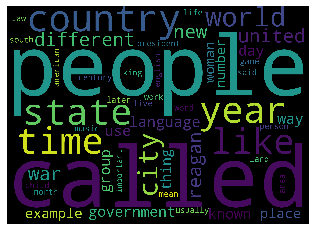

In [16]:
lsi_modeling.get_wordcloud(test_docs[30], n_top_words=50)

40 ['country', 'people', 'china', 'region', 'india', 'republic', 'city', 'world', 'population', 'capital', 'area', 'largest', 'state', 'province', 'east', 'language', 'government', 'national', 'south', 'century', 'million', 'european', 'divided', 'called', 'border', 'culture', 'indian', 'nation', 'territory', 'independent', 'known', 'official', 'chinese', 'land', '000', 'west', 'north', 'kingdom', 'main', 'year', 'central', 'eastern', 'live', 'religion', 'economy', 'member', 'union', 'western', 'river', 'asia']


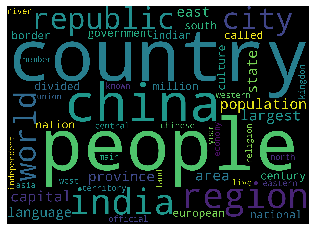

In [17]:
lda_modeling.get_wordcloud(test_docs[30], n_top_words=50)

15 ['island', 'pacific', 'mile', 'british', 'largest', 'coast', 'ocean', 'small', 'population', 'speak', 'group', 'world', 'main', 'near', 'biggest', 'japan', 'ireland', 'land', 'volcano', 'south', 'east', 'km', 'nation', 'called', 'force', 'territory', 'united', 'native', 'port', '10', 'live', 'kingdom', 'beach', 'includes', 'australia', 'long', 'park', '000', 'large', 'west', 'official', 'took', 'smaller', 'st', 'britain', 'continent', 'lived', 'northern', 'prime', 'joined']


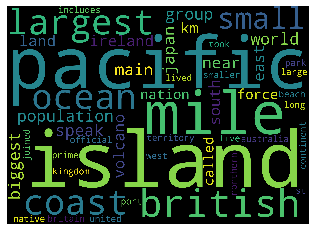

In [18]:
nmf_modeling.get_wordcloud(test_docs[30], n_top_words=50)